# Import Statements

In [1]:
import MCNeuronSim.src.MCNeuronSim.Electrode as MCE
import MCNeuronSim.src.MCNeuronSim.Neuron as MCN
import MCNeuronSim.src.MCNeuronSim.Neuropixel_Shank as MCNS

import numpy as np

# Electrode Example

0


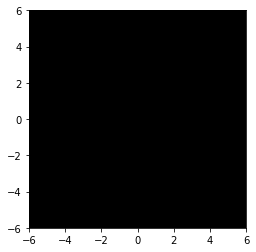

1
[9999]
False True


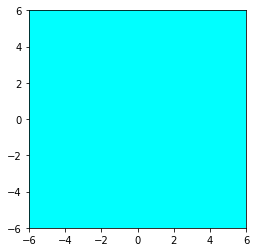

In [2]:
#define E_1, an Electrode object centered at (0,0) with a 30kHz sample rate
E_1 = MCE.Electrode(samp_rate = 30000, center = (0,0), number = "1")
print(E_1.activity) #it's innately initialized to be inactive

E_1.contour_plot() #plot inactive electrode

#initialize a voltage above the voltage threshold 
E_1.activity = 9999
print(E_1.activity)
print(E_1.v_readout)
print(E_1.on_electrode(-8, 3), E_1.on_electrode(2,-3))

E_1.contour_plot() #plot active electrode

# Neuron Example

The wormlike chain algorithm for the neuron is based on a discretized version of the original Kratky-Porod model of a continuous semiflexible polymer. The algorithm is first described in [Schellman, J. A., “Flexibility of DNA,” Biopolymers 13, 217-226 (1974)](https://onlinelibrary.wiley.com/doi/abs/10.1002/bip.1974.360130115) and was therein referred to as the random $\phi$
 model. In this model, the chain is approximated as a series of discrete segments of equal length. In spherical coordinates, the change in direction between successive segments is described by two angles: the zenith angle $\theta$ and the azimuthal angle $\phi$. The azimuthal angle is allowed to vary randomly and uniformly between $0$ and $2\pi$. The zenith angle is a random number whose probability distribution function reflects the rigidty of the polymer and is related to the persistence length.
 
The probability distribution for the zenith angle is derived by considering the change in energy $E_i$ between segments $i$ and $i + 1$ to be only a function of the angle $\theta_i$ between segments. Using a Taylor series expansion about $\theta_i = 0$, we can write $E_i$ as
$$E_i(\theta_i) = E_i(0) + \left. \frac{d E_i}{d \theta_i}\right|_{\theta_i =0} \theta_i + \left.\frac{1}{2!}\frac{d^2 E_i}{d^2 \theta_i^2}\right|_{\theta_i =0} \theta_i^2 + ...$$

At equilibrium, we can set the first derivative equal to zero. Additionally, the change in energy due to bending for two segments which are completely aligned is zero. Thus, neglecting higher order terms, we can write

$$ E_i(\theta_i) \approx \left.\frac{1}{2!}\frac{d^2 E_i}{d^2 \theta_i^2}\right|_{\theta_i =0} \theta_i^2 $$

Using Boltzmann statistics, we can obtain a probability function for the zenith angle $\theta$. It needs to be weighted by a factor of $\sin(\theta)$ in order to reflect that integration over all possible bending angles is $d\Omega = \sin(\theta) d\theta d\phi$.

$$P(\theta) = \frac{1}{Z} \exp\left[-\frac{E_i''(0) \theta^2}{2K_bT} \right] \sin(\theta)$$

However, since we are only considering small angles, it is a reasonable approximation to allow $\sin(\theta) \approx \theta$. Then, the normalization constant is given by allowing the partition function to become continuous. We can make the integral tractable by allowing the bounds to go from zero to infinity. In doing so, we approximate that the contributions to the probability from such large bend angles is negligible because in practice, these angles are extremely unlikely.

$$\begin{align}
Z &= \sum_i^\infty \exp\left[-\frac{E_i''(0) \theta_i^2}{2K_bT} \right] \theta_i\\
a &\equiv \frac{E_i''(0)}{K_bT} \\
Z &= \int_0^\infty \theta \exp \left[\frac{-a\theta^2}{2} \right] d\theta \\
Z &= \frac{1}{a} \\
P(\theta) &= a \exp \left[\frac{-a\theta^2}{2} \right] \theta \\
\end{align}$$

However, this just tells us that the probability distribution for the zenith angle is given by a rayleigh distribution with $\sigma = \frac{1}{a}$.
$$R(x) = \frac{x}{\sigma^2} e^{-x^2/2\sigma^2}$$

Using this probability distribution, the characteristic Flory Ratio $C_\infty$ for an infinite number of steps can be calculated to be 

$$C_\infty = \frac{l}{1-L(a)} $$

where $L(a)$ is the Langevin function. For large enough $a$, the Langevin function $L(x) \approx \frac{1}{x}$. Thus, using the fact that the Flory ratio for an infinite number of steps is an alternate definition of the persistence length $l_p$, we see that $a = \frac{l_p}{l}$. Thus, we can write the final probability distribution for the zenith angle as the rayleigh distribution with $\sigma^2 = \frac{l}{l_p}$. This gives us the following probability distribution for the zenith angle:

$$P(\theta) = \theta \frac{l_p}{l} \exp \left[\frac{-l_p\theta^2}{2l} \right] $$

<Axes3DSubplot:xlabel='X', ylabel='Y'>

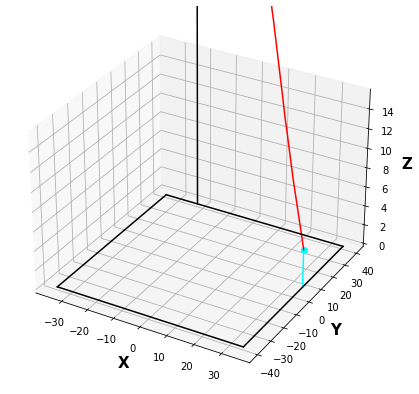

In [3]:
#defining neuron characteristics
samp_rate = 30000 #[Hz]
x = np.random.choice([-35, 35])
y = np.random.uniform(-16,16)
z = np.random.uniform(0,5)
origin = (x, y, z) #x, y, z [um]
bounding  = (-35, 35, -40, 40, 0)


#Creating Neuron object
N = MCN.Neuron(samp_rate, origin, bounding, persist_len = 1000)
N.plot_neuron()

# Neuropixel Shank Example

Using the ```animate_2Dshank()``` method, ```Neuropixel_Shank``` objects can animate a simulated action potential as it propagates down the neuron from a bird’s eye view, though it doesn't show up in the static view on Github's .ipynb file viewer. If the voltage potential at an electrode passes the electrode’s 5rms threshold, it turns cyan to indicate that it is active. 

Using the ```readout()``` method, ```Neuropixel_Shank``` objects can display a readout of the electrode array as the simulated action potential propagates down the neuron on the array. The horizontal dotted black line indicates the 5rms threshold for each electrode, while the vertical red lines are a visual representation of the sample rate of the array.


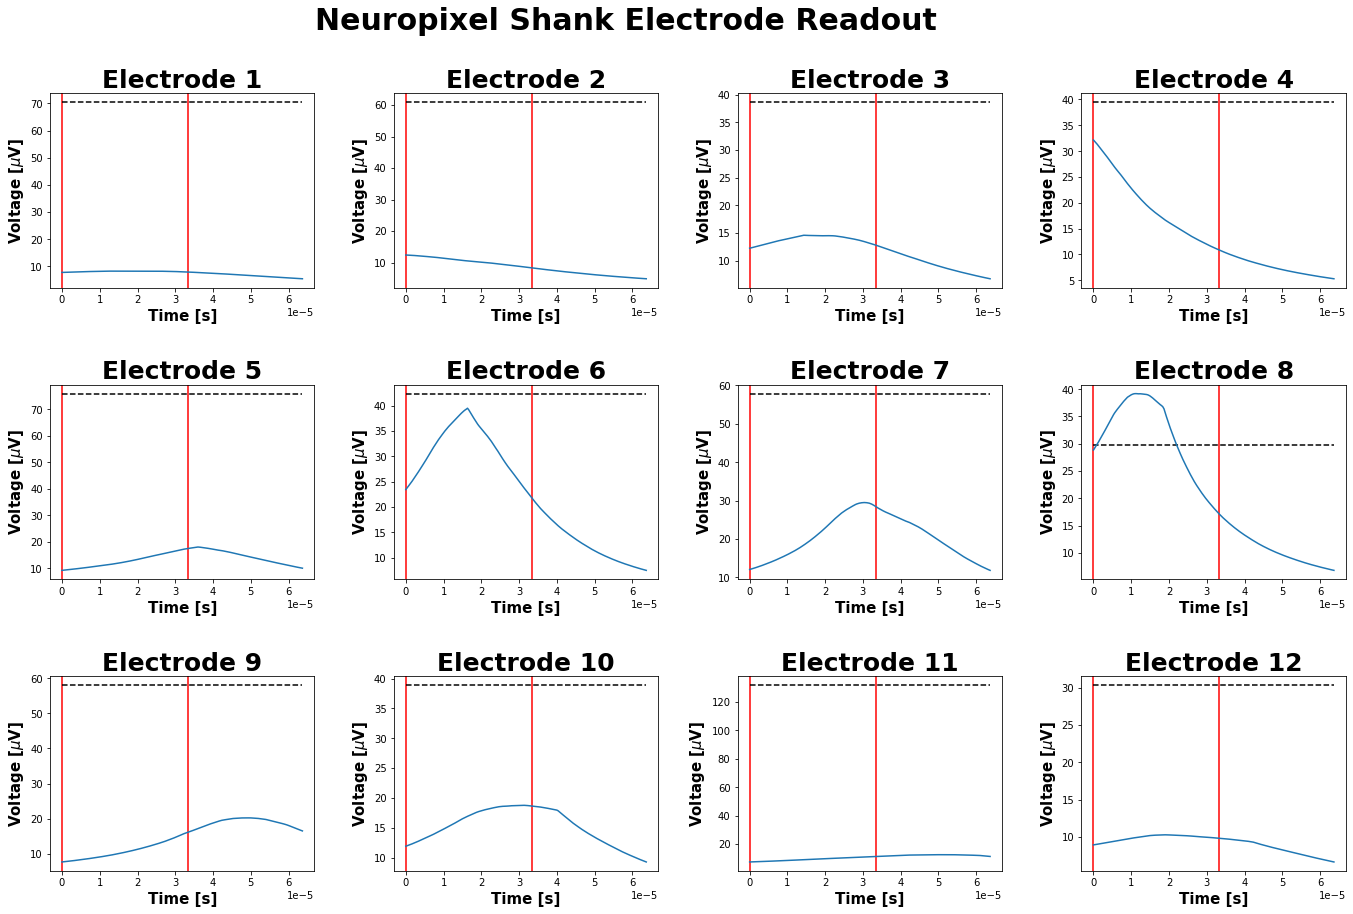

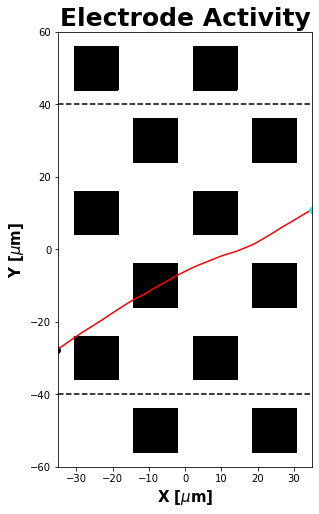

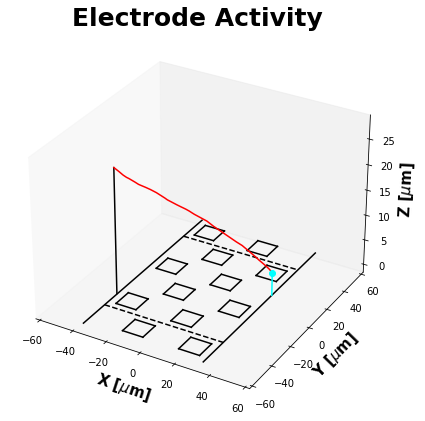

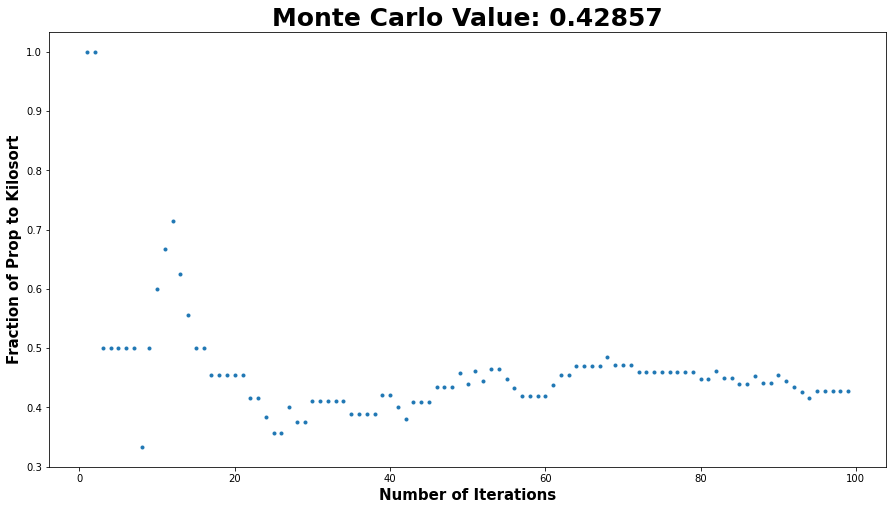

In [4]:
neuropixel = MCNS.Neuropixel_Shank(samp_rate = 30000, persist_len = 1000)
neuropixel.readout()
neuropixel.animate_2Dshank()
neuropixel.plot_2Dshank()
neuropixel.animate_3Dshank()
neuropixel.plot_3Dshank()
neuropixel.plot_monte_carlo(100)